<a href="https://colab.research.google.com/github/RoseMwangi98/Titanic_KNN_Naive-_Bayer/blob/main/NAIVE_EMAIL_SPAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Defining the Question

To determine whether an email is Spam or Not Spam using the data provided.

2.Metric for Success

To build a model that accurately predicts whether an email is spam or not.

3.The Context

Given a Dataset containing emails we would like to predict whether an email is important or not by observing the frequency of certain words in the dataset.

4.The Experimental Design Taken

This first step of this analysis will be loading the dataset , the appropriate libraries and then taking the necessary steps to clean the data.
Next I will carry out Univariate and Bivariate data analysis while dealing with the outliers found within my dataset

Finally I will build Naive_Bayes models and evaluate their performance on the dataset at hand and then provide observations and recommendations on the suitability of each of the tested models on their appropriateness of solving the given problem.

5.The Appropriateness of the data to answer the given question.

Given the task at hand the data is appropriate for our analysis.

**LOADING THE LIBRARIES NEEDED**

In [59]:
# Loading the Appropriate Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ;sns.set_style("whitegrid")
from scipy.stats import pearsonr
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, normalize, Normalizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
# Importing the dataset
email= pd.read_csv('spambase.data',header=None)
email.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [12]:

names = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", 
                      "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", 
                      "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", 
                      "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", 
                      "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", 
                      "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", 
                      "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", 
                      "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", 
                      "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
                      "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", 
                      "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", 
                      "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average", 
                      "capital_run_length_longest", "capital_run_length_total", "spam"]

In [13]:
email = pd.read_csv('spambase.data',names = names)

In [14]:
email.shape

(4601, 58)

In [15]:
email.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [16]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [17]:
email.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

**DATA CLEANING**

In [18]:
email.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [19]:
email.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [6]:
email.duplicated().sum()

391

In [7]:
email.drop_duplicates(inplace=True)

**EXPLORATORY DATA ANALYSIS**

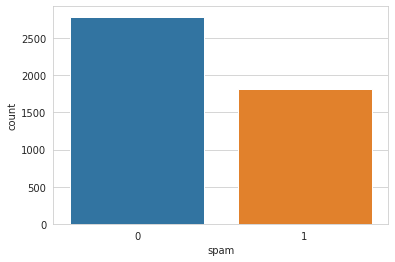

In [21]:
sns.countplot(x = email.spam,data=email)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c4ebf9e10>,
      dtype=object)

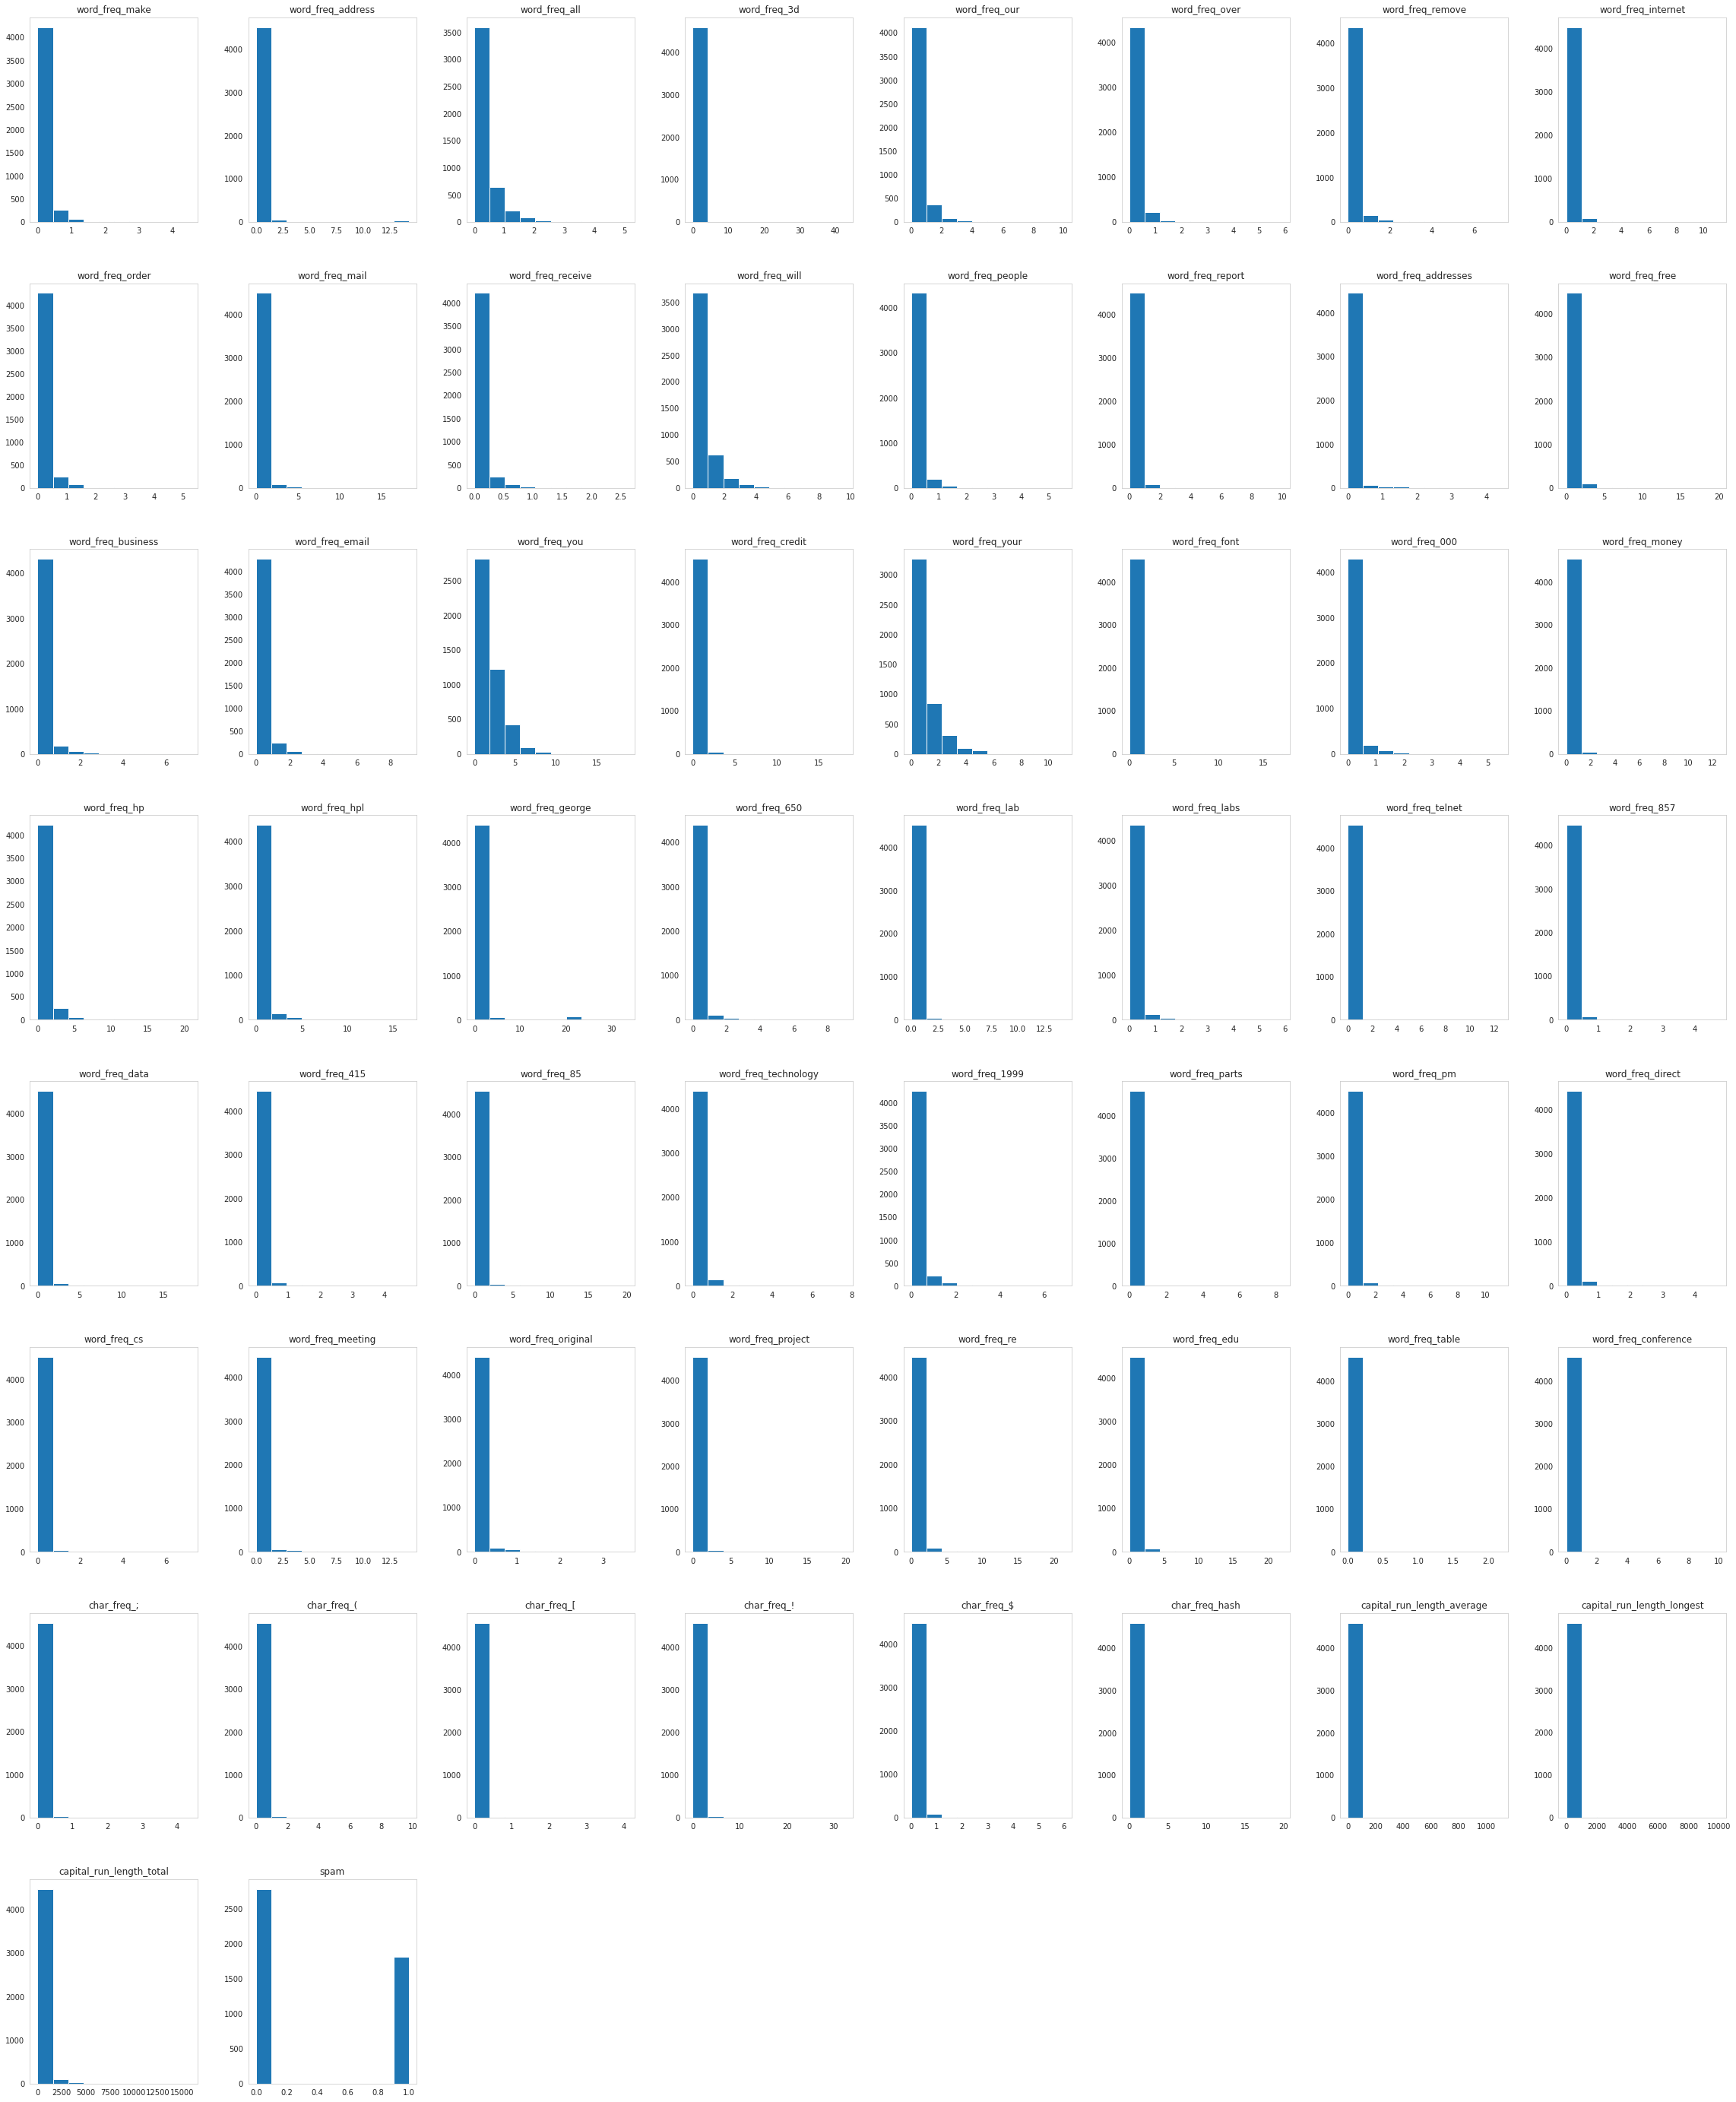

In [22]:
email.hist(grid=False,figsize=(40,50))

**FEATURE ENGINEERING**

In [23]:
features = email.iloc[:,0:57].columns.tolist()
target = email.iloc[:,57].name




In [25]:
# Finding Correlation of spam and other variables to see how many variables are strongly correlated with the Target
# Finding Correlation of spam and other variables to see how many variables are strongly correlated with the Target
correlations = {}
for f in features:
    data_temp = email[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]


In [27]:
# Printing all the correlated features value with respect to Spam which is target variable
# Printing all the correlated features value with respect to Spam which is target variable
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
word_freq_your vs spam,0.383234
word_freq_000 vs spam,0.334787
word_freq_remove vs spam,0.332117
char_freq_$ vs spam,0.323629
word_freq_you vs spam,0.273651
word_freq_free vs spam,0.263215
word_freq_business vs spam,0.263204
word_freq_hp vs spam,-0.256723
capital_run_length_total vs spam,0.249164
word_freq_our vs spam,0.241920


In [28]:
X = email.drop(['word_freq_project','word_freq_font','word_freq_conference','char_freq_[','char_freq_hash','char_freq_;','word_freq_direct',
 'word_freq_3d','word_freq_report','word_freq_table','word_freq_parts','word_freq_will','spam'],axis=1)

**NAIVE BAYER CLASSIFICATION 80/20**

I used the Gaussian Naive Bayes,since the variables were continous.The train and test is 80:20.

In [55]:
X = email.drop('spam',axis=1)
y = email.spam
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [68]:
sc = StandardScaler(with_std = False, with_mean = False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#apply reduction to increase accuracy

lda = LDA(n_components=10)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [69]:
gb = GaussianNB()
gb = gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

In [70]:
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print()
print("Classification Report: ")
print(classification_report(y_test,y_pred))
print()
print('Confusion Matrix :')
confusion_matrix(y_test,y_pred)

Accuracy Score: 0.8914223669923995

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       559
           1       0.91      0.80      0.85       362

    accuracy                           0.89       921
   macro avg       0.90      0.88      0.88       921
weighted avg       0.89      0.89      0.89       921


Confusion Matrix :


array([[530,  29],
       [ 71, 291]])

**NAIVE BAYERS MODEL 70/30**

In [49]:
X = email.drop('spam',axis=1)
y = email.spam
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [65]:
sc = StandardScaler(with_std = False, with_mean = False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#apply reduction to increase accuracy

lda = LDA(n_components=10)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [66]:
gb = GaussianNB()
gb = gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

In [67]:
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print()
print("Classification Report: ")
print(classification_report(y_test,y_pred))
print()
print('Confusion Matrix :')
confusion_matrix(y_test,y_pred)

Accuracy Score: 0.8914223669923995

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       559
           1       0.91      0.80      0.85       362

    accuracy                           0.89       921
   macro avg       0.90      0.88      0.88       921
weighted avg       0.89      0.89      0.89       921


Confusion Matrix :


array([[530,  29],
       [ 71, 291]])

**NAIVE BAYERS 60/40**

In [46]:
X = email.drop('spam',axis=1)
y = email.spam
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=10)

In [63]:
sc = StandardScaler(with_std = False, with_mean = False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#apply reduction to increase accuracy

lda = LDA(n_components=10)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [64]:
gb = GaussianNB()
gb = gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

In [62]:
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print()
print("Classification Report: ")
print(classification_report(y_test,y_pred))
print()
print('Confusion Matrix :')
confusion_matrix(y_test,y_pred)

Accuracy Score: 0.8914223669923995

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       559
           1       0.91      0.80      0.85       362

    accuracy                           0.89       921
   macro avg       0.90      0.88      0.88       921
weighted avg       0.89      0.89      0.89       921


Confusion Matrix :


array([[530,  29],
       [ 71, 291]])

**CONCLUSION**

The accuracy score across the various model is 89% which was fairly consient among the various models.
The use of standard scaler and linear reduction increased the accuracy.


